<a href="https://colab.research.google.com/github/DiegoPuentes/MachineLearning/blob/main/R2_A3_S9_Regresi%C3%B3n_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   HouseID   SquareFeet  Bedrooms  Bathrooms          Price
0     1641   934.741032         3          3  123411.842428
1     9584  4654.477596         3          2  155824.707159
2     8684   587.298366         4          2  192054.415998
3     4180   531.792639         4          1  443683.966308
4     8653  4867.312578         2          2  227121.314282 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   HouseID     2000 non-null   int64  
 1   SquareFeet  2000 non-null   float64
 2   Bedrooms    2000 non-null   int64  
 3   Bathrooms   2000 non-null   int64  
 4   Price       2000 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 78.2 KB
None 

           HouseID   SquareFeet     Bedrooms    Bathrooms          Price
count  2000.000000  2000.000000  2000.000000  2000.000000    2000.000000
mean   5491.651500  2769.066571     2.494

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


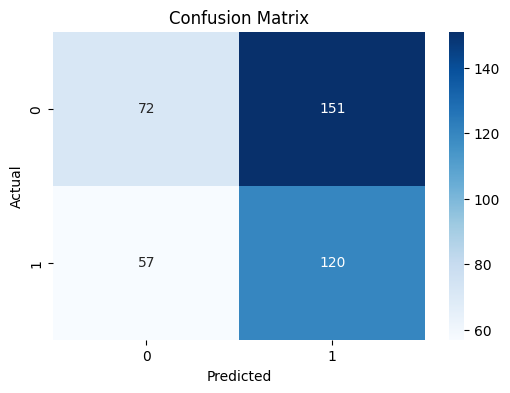

Model accuracy: 0.48
Classification report:
               precision    recall  f1-score   support

           0       0.56      0.32      0.41       223
           1       0.44      0.68      0.54       177

    accuracy                           0.48       400
   macro avg       0.50      0.50      0.47       400
weighted avg       0.51      0.48      0.47       400



In [10]:
#Import the libraries necesary for the execute of the code.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#Read the information of the file
data = pd.read_csv('house_prices.csv')

#Display the information of the ile
print(data.head(), '\n')
print(data.info(), '\n')
print(data.describe(), '\n')

#Find the median of the price for categorize in two groups the price whether it is higher or lower to 300000
data['Price_Category'] = np.where(data['Price'] > 300000, 1, 0)

#Delete the columns
x = data.drop(['Price', 'Price_Category'], axis=1)
y = data['Price_Category']

#Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Scaler the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#Training the model
model = LogisticRegression()
model.fit(x_train_scaled, y_train)

#Predict the info
y_pred = model.predict(x_test)

#Display the data
print(y_pred )
print('\n')

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print('Model accuracy:', accuracy_score(y_test, y_pred))
print('Classification report:\n', classification_report(y_test, y_pred))